# Stations Dataset 1

**Dictionary**

**station_id:** station ID number

**name:** name of station

**lat:** station latitude

**long:** station longitude

**install_date:** date that station was placed in service

**install_dockcount:** number of docks at each station on the installation date

**modification_date:** date that station was modified, resulting in a change in location or dock count

**current_dockcount:** number of docks at each station on 8/31/2016

**decommission_date:** date that station was placed out of service

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [3]:
station = pd.read_csv('station.csv', error_bad_lines=False)
station.head(60)

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN
5,CBD-04,Union St & 4th Ave,47.609221,-122.335596,7/27/2015,18,NaN,18,NaN
6,CBD-05,1st Ave & Marion St,47.604058,-122.335800,10/13/2014,20,NaN,20,NaN
7,CBD-06,2nd Ave & Spring St,47.605950,-122.335768,10/13/2014,20,11/9/2015,18,NaN
8,CBD-07,City Hall / 4th Ave & James St,47.603509,-122.330409,10/13/2014,20,NaN,20,NaN
9,CBD-13,2nd Ave & Pine St,47.610185,-122.339641,10/13/2014,18,NaN,18,NaN


In [4]:
station.shape

(58, 9)

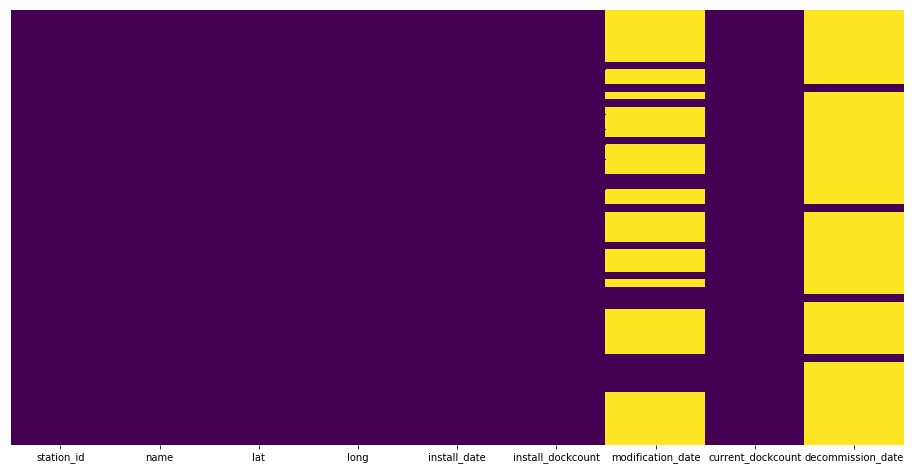

In [7]:
plt.figure(figsize=(16, 8))
sb.heatmap(station.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [2]:
import folium
m = folium.Map(location=[47.6080, -122.3351])

In [12]:
def generateBaseMap(default_location=[47.6080, -122.3351], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data=station[['lat', 'long']].groupby(['lat', 'long']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

/Applications/anaconda3/envs/nf3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4315: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  stacked_values = np.vstack(map(np.asarray, values))


In [9]:
import folium
mapa = folium.Map(location=[ 47.608013,  -122.335167], zoom_start=12, height=1000, tiles='CartoDB dark_matter') #tiles="CartoDB dark_matter") # Determining the seattle map using latitude and longitude data
lat = station['lat'].values # taking the latitude values from the stations of the dataset station
long = station['long'].values # taking the values of longitude of the stations of the dataset station

for la, lo in zip(lat, long): # for each value in lat and long...
    folium.CircleMarker([la, lo], fill=True).add_to(mapa) # create a marker and place in the map variable (which in this case is the map of Seattle)
mapa # Show the Map